In [56]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

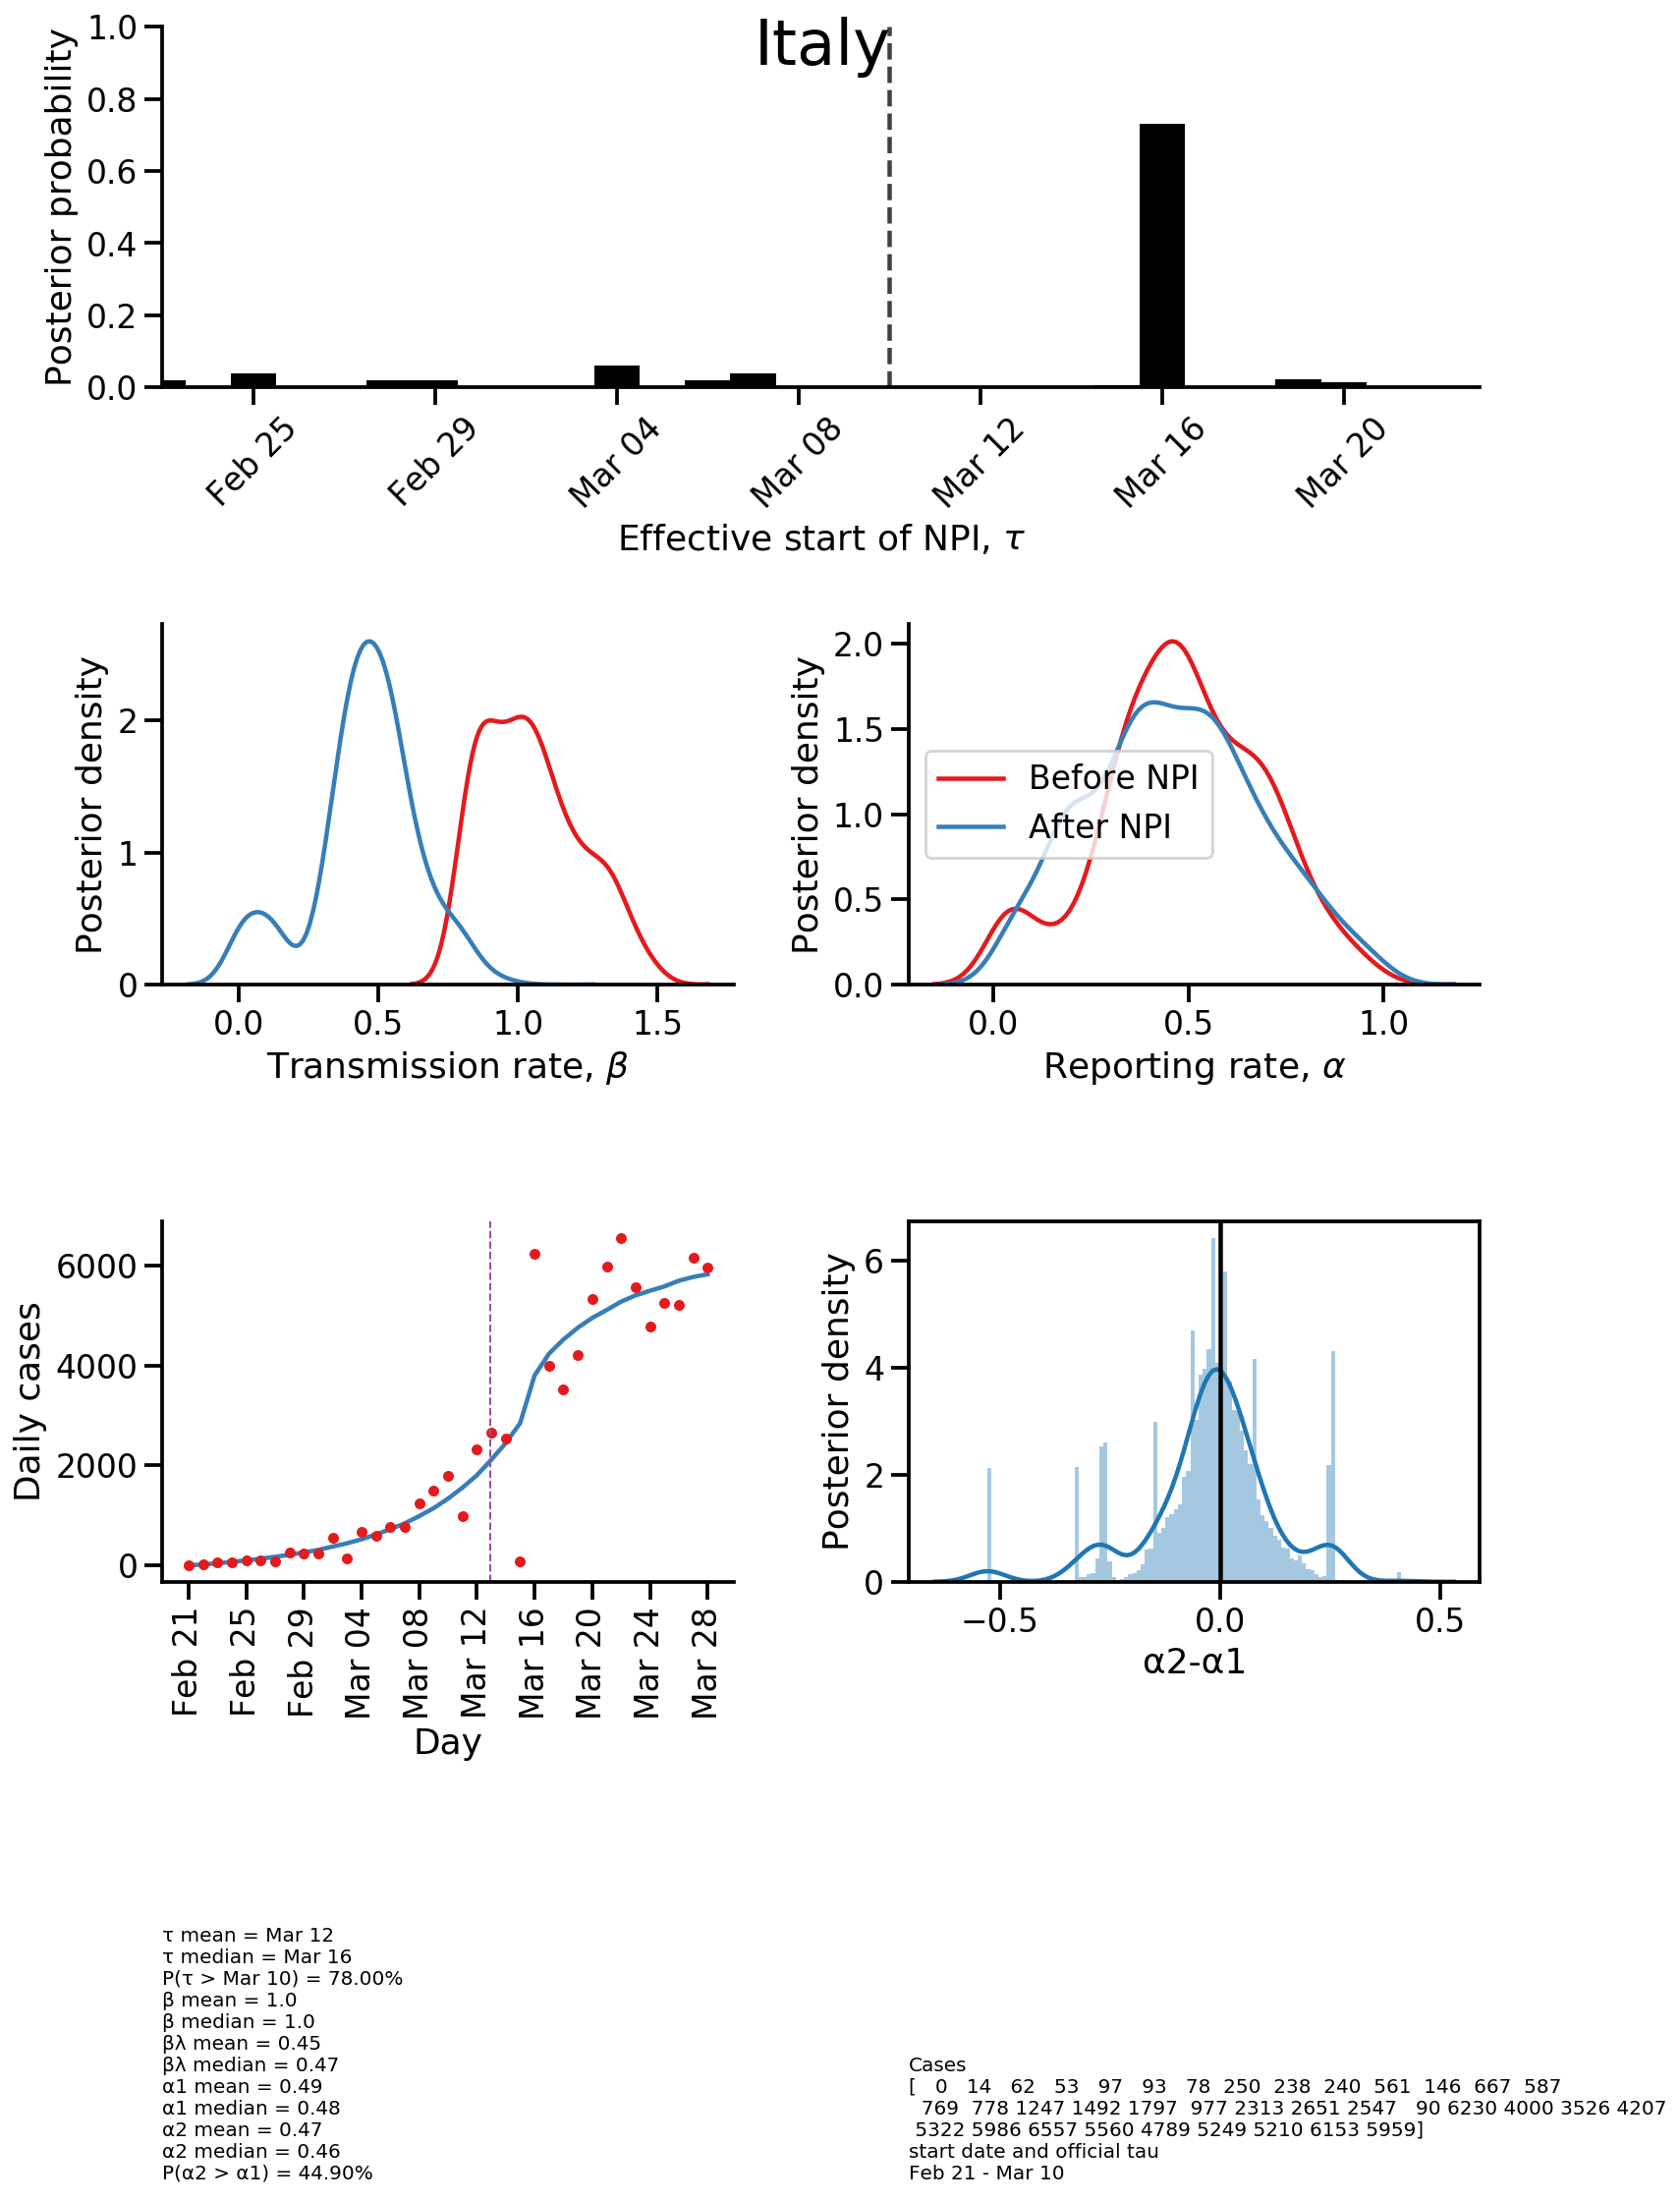

In [69]:
country_name = 'Italy'
# file_name = '../output/25-Apr_03-ysum-and-initdate-fixes/inference/{}.npz'.format(country_name)
file_name = '../output-tmp/25-Apr-ode-bug-fix/inference/{}.npz'.format(country_name)
load_data(file_name)
plot_all();